# PyBer Ride Sharing

Analysis:
1. There are more total rides in the urban city causing drivers to stay in the urban city to meet demand, with the highest driver count in the urban city. 
2. However, in the Urban city the average fare is lower than any other city.
3. It appears that even though in the surban city there are less total rides, the fares tend to be higher.

In [2]:
#Import matplot, pandas, numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [7]:
#Import data and read city_data
city_data = os.path.join("..", "Assignment 5", "Raw_Data", "city_data.csv")
city_path = "Desktop/UT-Data-bootcamp/Assignment 5/Raw_Data/city_data.csv"
city_data1 = pd.read_csv(city_path)
city_data1 = city_data1.drop_duplicates('city', keep='last')

#Import data and read ride_data
ride_data = os.path.join("..", "Assignment 5", "Raw_Data", "ride_data.csv")
ride_path = "Desktop/UT-Data-bootcamp/Assignment 5/Raw_Data/ride_data.csv"
ride_data1 = pd.read_csv(ride_path)

#Merge data and create dataframe
city_merge = pd.merge(city_data1, ride_data1, on='city', how='outer')
city_merge.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [33]:
#Create a groupby City to obtain: 

#Total Number of Rides Per City
#Total Number of Drivers Per City
#Average Fare ($) Per City
#City Type (Urban, Suburban, Rural)

#Total Number of Rides Per City
city_group = city_merge.groupby('city')
total_rides = city_group['ride_id'].count()
#total_rides = len(city_group['ride_id'].unique())
#total_rides

#Total Number of Drivers Per City
indexchange = city_data1.set_index('city')
number_drivers = indexchange['driver_count']
#number_drivers = len(city_group['driver_count'].unique())
#number_drivers

#Average Fare ($) Per City
avg_fare = city_group['fare'].mean()
#avg_fare

#City Type (Urban, Suburban, Rural)
city_type = indexchange['type']

In [34]:
#Create new dataframes for bubble chart
bubble_df = pd.DataFrame({'avg_fare_per_ride': avg_fare, 'type': city_type, 'total_ride_count': total_rides, 'driver_count': number_drivers})


urban_df = bubble_df[(bubble_df['type'] == 'Urban')]
suburban_df = bubble_df[(bubble_df['type'] == 'Suburban')]
rural_df = bubble_df[(bubble_df['type'] == 'Rural')]

bubble_df.head()

,avg_fare_per_ride,driver_count,total_ride_count,type
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Anitamouth,37.315556,16,9,Suburban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban


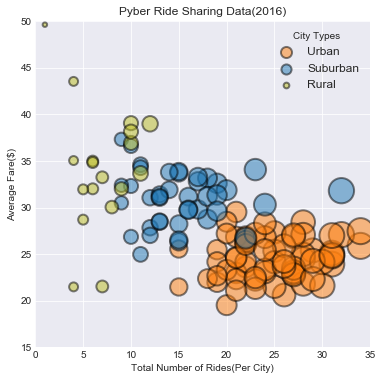

In [84]:
#Create bubble chart to show average fare and total number of rides per city type
plt.figure(figsize=(6, 6))
plt.style.use('seaborn-darkgrid')

urban = plt.scatter(urban_df['total_ride_count'], urban_df['avg_fare_per_ride'], s=urban_df['total_ride_count']*20,
                   c='C1', label='Urban', alpha=0.5, edgecolors='black', linewidths=2)
suburban = plt.scatter(suburban_df['total_ride_count'], suburban_df['avg_fare_per_ride'], s=suburban_df['total_ride_count']*20,
                              c='C0', label='Suburban', alpha=0.5, edgecolors='black', linewidths=2)
rural = plt.scatter(rural_df['total_ride_count'], rural_df['avg_fare_per_ride'], s=rural_df['total_ride_count']*20, 
                           c='C8', label='Rural', alpha=0.5, edgecolors='black', linewidths=2)

plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')

plt.legend(handles=[urban, suburban, rural], loc='best', title='City Types', markerscale=0.5,
           fontsize='large')
plt.xlim(0, 35)
plt.ylim(15, 50)
plt.show()

In [78]:
#In addition, you will be expected to produce the following three pie charts:

#% of Total Fares by City Type
#% of Total Rides by City Type
#% of Total Drivers by City Type

#Create Pie Chart 1 df % of total fares by City Type
pie1_df = city_merge.groupby('type')
fare_city_type = pie1_df['fare'].sum()
#fare_city_type

#Create Pie Chart 2 df % of Total Rides by City Type
pie2_df = bubble_df.groupby('type')
total_city_rides = pie2_df['total_ride_count'].sum()
#total_city_rides

#Create Pie Chart 3 df % of Total Drivers by City Type
pie3_df = pie2_df['driver_count'].sum()
#pie3_df

In [79]:
#Pie Charts

explode = [0, 0.1, 0.1]
colors = ['gold', 'lightblue', 'salmon']
labels = ['Rural', 'Suburban', 'Urban']

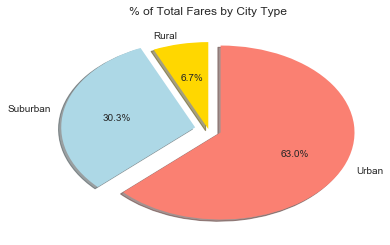

In [81]:
#Total fares by city type pie chart

plt.pie(fare_city_type, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('% of Total Fares by City Type')
plt.show()

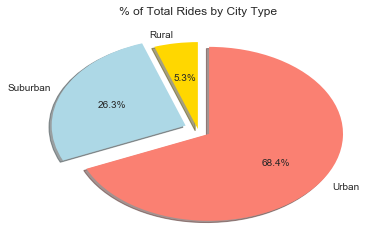

In [82]:
#Total rides by city type

plt.title('% of Total Rides by City Type')
plt.pie(total_city_rides, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

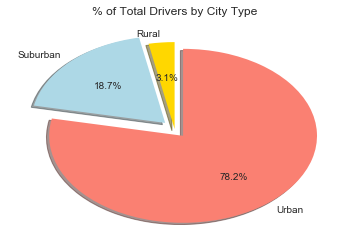

In [83]:
#Total drivers by city type
plt.title('% of Total Drivers by City Type')
plt.pie(pie3_df, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()
